In [1]:
import math, sys, os, itertools
import pandas as pd
import numpy as np

Algorithm: Ok so to solve this problem we need to actually identify how to split the number $N$ to maximize that. So here's some average calculus bs

Let $k$ be an integer, and $r = \frac{N}{k}$. We want to find $k$ so that $r^k$ is max. To do so, we consider the function:

$$
P(k) = \left(\frac{N}{k}\right)^k
$$

And now we basically find the max value of this function via integer $k$. Let's assume that $k$ isn't just an integer anymore, it's a real value and we want to find maximum of $P(k)$ accross all real value $k$. So we have the first condition: $k > 0$. This will also make $P > 0$. Since $P > 0$, consider it's logarithm.:

$$
Q(k) = \ln P(k) = k \ln\left(\frac{N}{k}\right) = k (\ln N - \ln k) = k\ln N - k\ln k
$$

and do the derivative:

$$
\frac{\text{d}Q}{\text{d}k} = \ln N - \left(\ln k + k \frac{1}{k}\right) = \ln N - \ln k - 1
$$

Now we find the zero of the derivative. 

$$
\ln N - \ln k - 1 = 0 \Rightarrow \ln k = \ln N - 1 \Rightarrow k = \exp(\ln N - 1) = \frac{N}{e}
$$

For $k$ below $\frac{N}{e}$, the derivative is positive, and for $k$ above $\frac{N}{e}$, it is negative. Hence the actual function for $k \leq \frac{N}{e}$ will increase until it hits $k = \frac{N}{e}$, and then decrease with $k > \frac{N}{e}$. So in other words, $k =\frac{N}{e}$ makes the function attain the maximum value.

But the problem is now that $k$ is an INTEGER, but we note that the increase/decrease around the maxima is really strict, in the sense that the $k$ is to the value $\frac{N}{e}$, the better. So we just take $k = \left\lfloor \frac{N}{e} \right\rceil$. ok, we can also actually see the plot, thanks to `matplotlib`

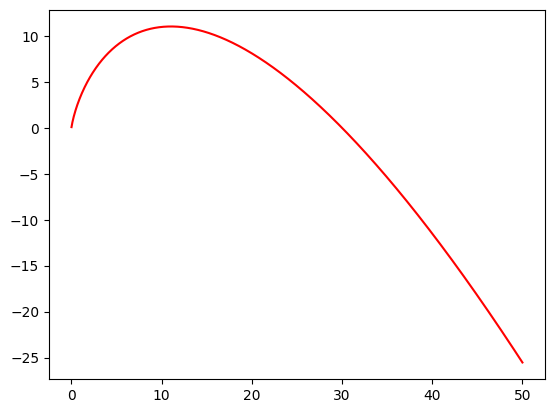

In [8]:
import matplotlib.pyplot as plt
import numpy as np

n = 30

def P(n: int, k: float) -> float:
    return math.pow(n / k, k)

def Q(n: int, k: float) -> float:
    # rewrite like this to prevent floating point bs
    return k * (math.log(n) - math.log(k))

x = np.linspace(0.01, 50, num=1000)
# y = np.array([P(n, i) for i in x])
z = np.array([Q(n, i) for i in x])
# plt.plot(x, y)
plt.plot(x, z, "r")

meanwhile we do these checks to see if a fraction terminates

In [3]:
def is_terminating_denominator(n: int) -> bool:
    for i in [2, 5]:
        while n % i == 0:
            n //= i
    return n == 1

def is_terminating_fraction(m: int, n: int) -> bool:
    k = math.gcd(m, n)
    n //= k
    return is_terminating_denominator(n)

is_terminating_fraction(512, 27)

False

and yeah we just add up. I love calculus AlsOb

In [4]:
def pmax_k(n: int) -> int:
    return int(round(n / math.e))

def D(n: int) -> int:
    k = pmax_k(n)
    return -n if is_terminating_fraction(n, k) else n 

D(8)

8

In [5]:
t = 0
z = 10000
for i in range(5, z + 1):
    t += D(i)
t

48861552